In [3]:
import pandas as pd
import ast
import numpy as np

In [4]:
df_manu=pd.read_csv('analyse.csv')
df_david=pd.read_csv('allocine.csv')


df_manu=df_manu.rename(columns={"title":'titre'  
})
df_manu['titre']=df_manu['titre'].str.strip().str.lower()
df_david['titre']=df_david['titre'].str.strip().str.lower()

df_final=pd.merge(df_manu,df_david,on='titre', how='inner')

In [5]:
df_final=df_final[['titre', 'nbre_entrees',
       'distributeur', 'country', 'genre', 'date', 'acteurs_real', 'budget_x',
       'public', 'durée',
       'directeur', 'acteurs', 'note_presse', 'note_spectateurs',
        'box_office_france', 'prix', 'nominations', 'budget_y',
       ]]

# création colonne acteurs

In [6]:
df_final['acteurs'] = df_final['acteurs'].apply(ast.literal_eval)

# Extract 'acteur1' and 'acteur2'
df_final['acteur1'] = df_final['acteurs'].apply(lambda x: x[0] if len(x) > 0 else None)
df_final['acteur2'] = df_final['acteurs'].apply(lambda x: x[1] if len(x) > 1 else None)
df_final['acteur3'] = df_final['acteurs'].apply(lambda x: x[2] if len(x) > 2 else None)

# autre

In [7]:
df_final['nbre_entrees'] = df_final['nbre_entrees'].str.replace(' ', '').astype(int)
df_final['note_presse'] = pd.to_numeric(df_final['note_presse'].str.replace(',', '.'), errors='coerce')
df_final['prix'] = pd.to_numeric(df_final['prix'], errors='coerce')
df_final['durée'] = df_final['durée'].str.split('h').apply(lambda x: int(x[0])*60 + int(x[1]) if len(x) == 2 else int(x[0]))

# chaque directeur: leur nbre moyen d'entrées par film répertorié

In [8]:
#nbre de films par dirlo
entries_by_director = df_final.groupby('directeur')['box_office_france'].sum()

# Comptez le nombre de fois où chaque directeur apparaît dans les lignes du df_finalFrame
director_counts = df_final['directeur'].value_counts()

# Divisez la somme des entrées par le nombre de fois où le directeur apparaît
result = entries_by_director / director_counts
# Calculate 'director_success' as a score out of 10 based on the total number of entries for each director
# director_success = (entries_by_director / entries_by_director.max() * 10).rename('director_success')
# print(entries_by_director.max())
# Update 'director_success' in the main df_finalFrame. If director is not present, set 'director_success' to 0.
df_final['director_moy_entr'] = df_final['directeur'].map(result).fillna(0)

# chaque acteur2: leur nbre moyen d'entrées par film répertorié

In [9]:
entries_by_director = df_final.groupby('acteur2')['box_office_france'].sum()

# Comptez le nombre de fois où chaque acteur2 apparaît dans les lignes du df_finalFrame
director_counts = df_final['acteur2'].value_counts()

# Divisez la somme des entrées par le nombre de fois où le acteur2 apparaît
result = entries_by_director / director_counts
# Calculate 'director_success' as a score out of 10 based on the total number of entries for each director
# director_success = (entries_by_director / entries_by_director.max() * 10).rename('director_success')
# print(entries_by_director.max())
# Update 'director_success' in the main df_finalFrame. If director is not present, set 'director_success' to 0.
df_final['acteur2_moy_entr'] = df_final['acteur2'].map(result).fillna(0)

# chaque acteur3: leur nbre moyen d'entrées par film répertorié

In [10]:
entries_by_director = df_final.groupby('acteur3')['box_office_france'].sum()

# Comptez le nombre de fois où chaque acteur3 apparaît dans les lignes du df_finalFrame
director_counts = df_final['acteur3'].value_counts()

# Divisez la somme des entrées par le nombre de fois où le acteur3 apparaît
result = entries_by_director / director_counts
# Calculate 'director_success' as a score out of 10 based on the total number of entries for each director
# director_success = (entries_by_director / entries_by_director.max() * 10).rename('director_success')
# print(entries_by_director.max())
# Update 'director_success' in the main df_finalFrame. If director is not present, set 'director_success' to 0.
df_final['acteur3_moy_entr'] = df_final['acteur3'].map(result).fillna(0)

# chaque acteur1: leur nbre moyen d'entrées par film répertorié

In [11]:
entries_by_director = df_final.groupby('acteur1')['box_office_france'].sum()

# Comptez le nombre de fois où chaque acteur1 apparaît dans les lignes du df_finalFrame
director_counts = df_final['acteur1'].value_counts()

# Divisez la somme des entrées par le nombre de fois où le acteur1 apparaît
result = entries_by_director / director_counts
# Calculate 'director_success' as a score out of 10 based on the total number of entries for each director
# director_success = (entries_by_director / entries_by_director.max() * 10).rename('director_success')
# print(entries_by_director.max())
# Update 'director_success' in the main df_finalFrame. If director is not present, set 'director_success' to 0.
df_final['acteur1_moy_entr'] = df_final['acteur1'].map(result).fillna(0)

# enleve Not A Number

In [12]:
df_final.isna().sum()
df_final=df_final.dropna()
df_final.isna().sum()
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2768 entries, 0 to 2823
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   titre              2768 non-null   object 
 1   nbre_entrees       2768 non-null   int64  
 2   distributeur       2768 non-null   object 
 3   country            2768 non-null   object 
 4   genre              2768 non-null   object 
 5   date               2768 non-null   object 
 6   acteurs_real       2768 non-null   object 
 7   budget_x           2768 non-null   object 
 8   public             2768 non-null   object 
 9   durée              2768 non-null   int64  
 10  directeur          2768 non-null   object 
 11  acteurs            2768 non-null   object 
 12  note_presse        2768 non-null   float64
 13  note_spectateurs   2768 non-null   object 
 14  box_office_france  2768 non-null   int64  
 15  prix               2768 non-null   float64
 16  nominations        2768 non-n

# enlever les dates 00/00/0000

In [13]:
df_final['date'] = pd.to_datetime(df_final['date'], errors='coerce')

#df_finaliltrer les lignes avec des dates valides
df_final= df_final.loc[df_final['date'].notnull()]

/tmp/ipykernel_55040/1236101364.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_final['date'] = pd.to_datetime(df_final['date'], errors='coerce')


# convertir la col date en semaine de l'année

In [14]:
import pandas as pd

# Supposons que vous avez un DataFrame 'df_final' avec une colonne 'date' contenant les dates
# Convertir la colonne 'date' en objets datetime si ce n'est pas déjà fait
df_final['date'] = pd.to_datetime(df_final['date'])

# Extraire le numéro de semaine de chaque date et l'ajouter comme nouvelle colonne
df_final['numero_semaine'] = df_final['date'].dt.isocalendar().week

# Remplacer le numéro de semaine 1 par 52 si c'est le cas (à la fin de l'année)
df_final['numero_semaine'] = df_final['numero_semaine'].apply(lambda x: 52 if x == 1 else x)

# Afficher les premières lignes du DataFrame mis à jour
print(df_final.head())


#on vire semaine 53 qui représente que 2 films
df_final=df_final.loc[df_final['numero_semaine']<53]
df_final.drop(['date'],axis=1)

                                  titre  nbre_entrees   distributeur  \
0                     quantum of solace       1703897  Sony Pictures   
1    the dark knight, le chevalier noir       1271688   Warner Bros.   
2                         kung fu panda        955571      Paramount   
3  hellboy ii les légions d'or maudites        408413      Universal   
4                            john rambo        391630   Metropolitan   

      country              genre       date  \
0  Etats-Unis  Aventure - Action 2008-10-31   
1  Etats-Unis          Comicbook 2008-08-13   
2  Etats-Unis       Animation 3D 2008-07-09   
3  Etats-Unis          Comicbook 2008-10-29   
4  Etats-Unis             Guerre 2008-02-06   

                                        acteurs_real       budget_x  \
0  ['Marc Foster', 'Daniel Craig', 'Mathieu Amalr...  225 000 000 $   
1  ['Christopher Nolan', 'Christian Bale', 'Heath...  185 000 000 $   
2  ['Pierre Arditi', 'Jack Black', 'Jackie Chan',...  130 000 000 $   


,titre,nbre_entrees,distributeur,country,genre,acteurs_real,budget_x,public,durée,directeur,...,nominations,budget_y,acteur1,acteur2,acteur3,director_moy_entr,acteur2_moy_entr,acteur3_moy_entr,acteur1_moy_entr,numero_semaine
0,quantum of solace,1703897,Sony Pictures,Etats-Unis,Aventure - Action,"['Marc Foster', 'Daniel Craig', 'Mathieu Amalr...",225 000 000 $,Tous publics,107,Marc Forster,...,3,200000000.0,Daniel Craig,Olga Kurylenko,Mathieu Amalric,1.006641e+06,931863.500,1837203.00,3.657319e+06,44
1,"the dark knight, le chevalier noir",1271688,Warner Bros.,Etats-Unis,Comicbook,"['Christopher Nolan', 'Christian Bale', 'Heath...",185 000 000 $,Tous publics,150,Christopher Nolan,...,22,185000000.0,Christian Bale,Philippe Valmont,Heath Ledger,2.236296e+06,3017442.000,3017442.00,7.919444e+05,33
2,kung fu panda,955571,Paramount,Etats-Unis,Animation 3D,"['Pierre Arditi', 'Jack Black', 'Jackie Chan',...",130 000 000 $,Tous publics,91,Mark Osborne,...,8,130000000.0,Manu Payet,Jack Black,Pierre Arditi,2.482828e+06,2078060.125,2855310.50,2.775016e+06,28
3,hellboy ii les légions d'or maudites,408413,Universal,Etats-Unis,Comicbook,"['Guillermo Del Toro', 'Ron Perlman']",85 000 000 $,Tous publics,110,Guillermo del Toro,...,4,85000000.0,Ron Perlman,Selma Blair,Doug Jones,7.305812e+05,638513.000,488709.50,6.385130e+05,44
4,john rambo,391630,Metropolitan,Etats-Unis,Guerre,"['Sylvester Stallone', 'Sylvester Stallone']",50 000 000 $,Moins de 12 ans,93,Sylvester Stallone,...,0,50000000.0,Sylvester Stallone,Julie Benz,Paul Schulze,1.192830e+06,826100.000,826100.00,7.594614e+05,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2819,sisu - de l'or et du sang,44625,SND,Finlande,Aventure - Action,[],6 000 000 $,Moins de 12 ans,91,Jalmari Helander,...,0,6200000.0,Jorma Tommila,Aksel Hennie,Jack Doolan,7.471100e+04,74711.000,74711.00,7.471100e+04,25
2820,"love again : un peu, beaucoup, passionnément",36242,Sony Pictures,Etats-Unis,Romance,[],9 000 000 $,Tous publics,105,Jim Strouse,...,0,9000000.0,Priyanka Chopra Jonas,Sam Heughan,Céline Dion,3.298500e+04,52151.000,52151.00,5.215100e+04,23
2821,showing up,33136,Diaphana,Etats-Unis,Comédie,[],0 $,Tous publics,108,Kelly Reichardt,...,7,0.0,Michelle Williams,Hong Chau,André Benjamin,5.091700e+04,65870.000,88466.25,1.443928e+05,18
2822,le croque-mitaine,101134,Walt Disney Pictures,Etats-Unis,Horreur,[],35 000 000 $,Moins de 12 ans,98,Rob Savage,...,0,41900000.0,Chris Messina,Sophie Thatcher,Vivien Lyra Blair,3.013160e+05,301316.000,301316.00,1.572190e+05,22


# visu du nbre_entrées_moyen par film répertorié en fction de la semaine dl'année

In [15]:
a=df_final.groupby(by='numero_semaine')['nbre_entrees'].mean()
a
import pandas as pd

# Supposons que vous ayez un DataFrame 'df_final' avec les colonnes 'numero_semaine' et 'nbre_entrees'

# Calculer la moyenne du nombre d'entrées par semaine
mean_entries_per_week = df_final.groupby(by='numero_semaine')['nbre_entrees'].mean()

# Calculer le nombre de films sortis par semaine
films_per_week = df_final.groupby(by='numero_semaine')['titre'].nunique()  # Supposons que 'film_id' est l'identifiant des films

# Diviser la moyenne d'entrées par semaine par le nombre de films sortis par semaine
result = mean_entries_per_week / films_per_week

# Afficher le résultat
print(result)

numero_semaine
2     3399.361317
3     4330.546237
4     3850.948876
5     4931.809541
6     4867.646006
7     9445.509280
8     4455.878580
9     4189.866025
10    3845.943983
11    3383.061130
12    5835.319867
13    3614.098400
14    4422.050139
15    4265.888158
16    3660.278239
17    8537.678254
18    6669.160124
19    4253.449380
20    7811.980159
21    6033.712674
22    4620.493159
23    5519.580546
24    6451.762287
25    2494.693972
26    6694.656250
27    6861.168381
28    8042.215023
29    6079.341784
30    5264.356879
31    6494.931570
32    4855.474048
33    5123.727901
34    4028.615636
35    3023.388400
36    3656.618056
37    3170.642800
38    2928.581818
39    3213.282699
40    4389.057286
41    4600.889256
42    4895.607610
43    7439.482759
44    4203.906735
45    5328.858392
46    4931.792996
47    6198.626913
48    6273.534483
49    5145.181287
50    8305.007243
51    6164.824132
52    1966.014422
dtype: float64


# heatmap   (sur col numériques)

In [16]:
def retour_num(df):
    return [i for i in df.columns if df[i].dtype == 'int64' or df[i].dtype == 'float64']

a=retour_num(df_final)

df_heat=df_final[a]      
df_heat.head()

,nbre_entrees,durée,note_presse,box_office_france,prix,nominations,budget_y,director_moy_entr,acteur2_moy_entr,acteur3_moy_entr,acteur1_moy_entr,numero_semaine
0,1703897,107,3.0,3722798,0.0,3,200000000.0,1.006641e+06,931863.500,1837203.0,3.657319e+06,44
1,1271688,150,4.0,3017442,6.0,22,185000000.0,2.236296e+06,3017442.000,3017442.0,7.919444e+05,33
2,955571,91,3.5,3151449,9.0,8,130000000.0,2.482828e+06,2078060.125,2855310.5,2.775016e+06,28
3,408413,110,3.7,638513,0.0,4,85000000.0,7.305812e+05,638513.000,488709.5,6.385130e+05,44
4,391630,93,2.6,826100,0.0,0,50000000.0,1.192830e+06,826100.000,826100.0,7.594614e+05,6


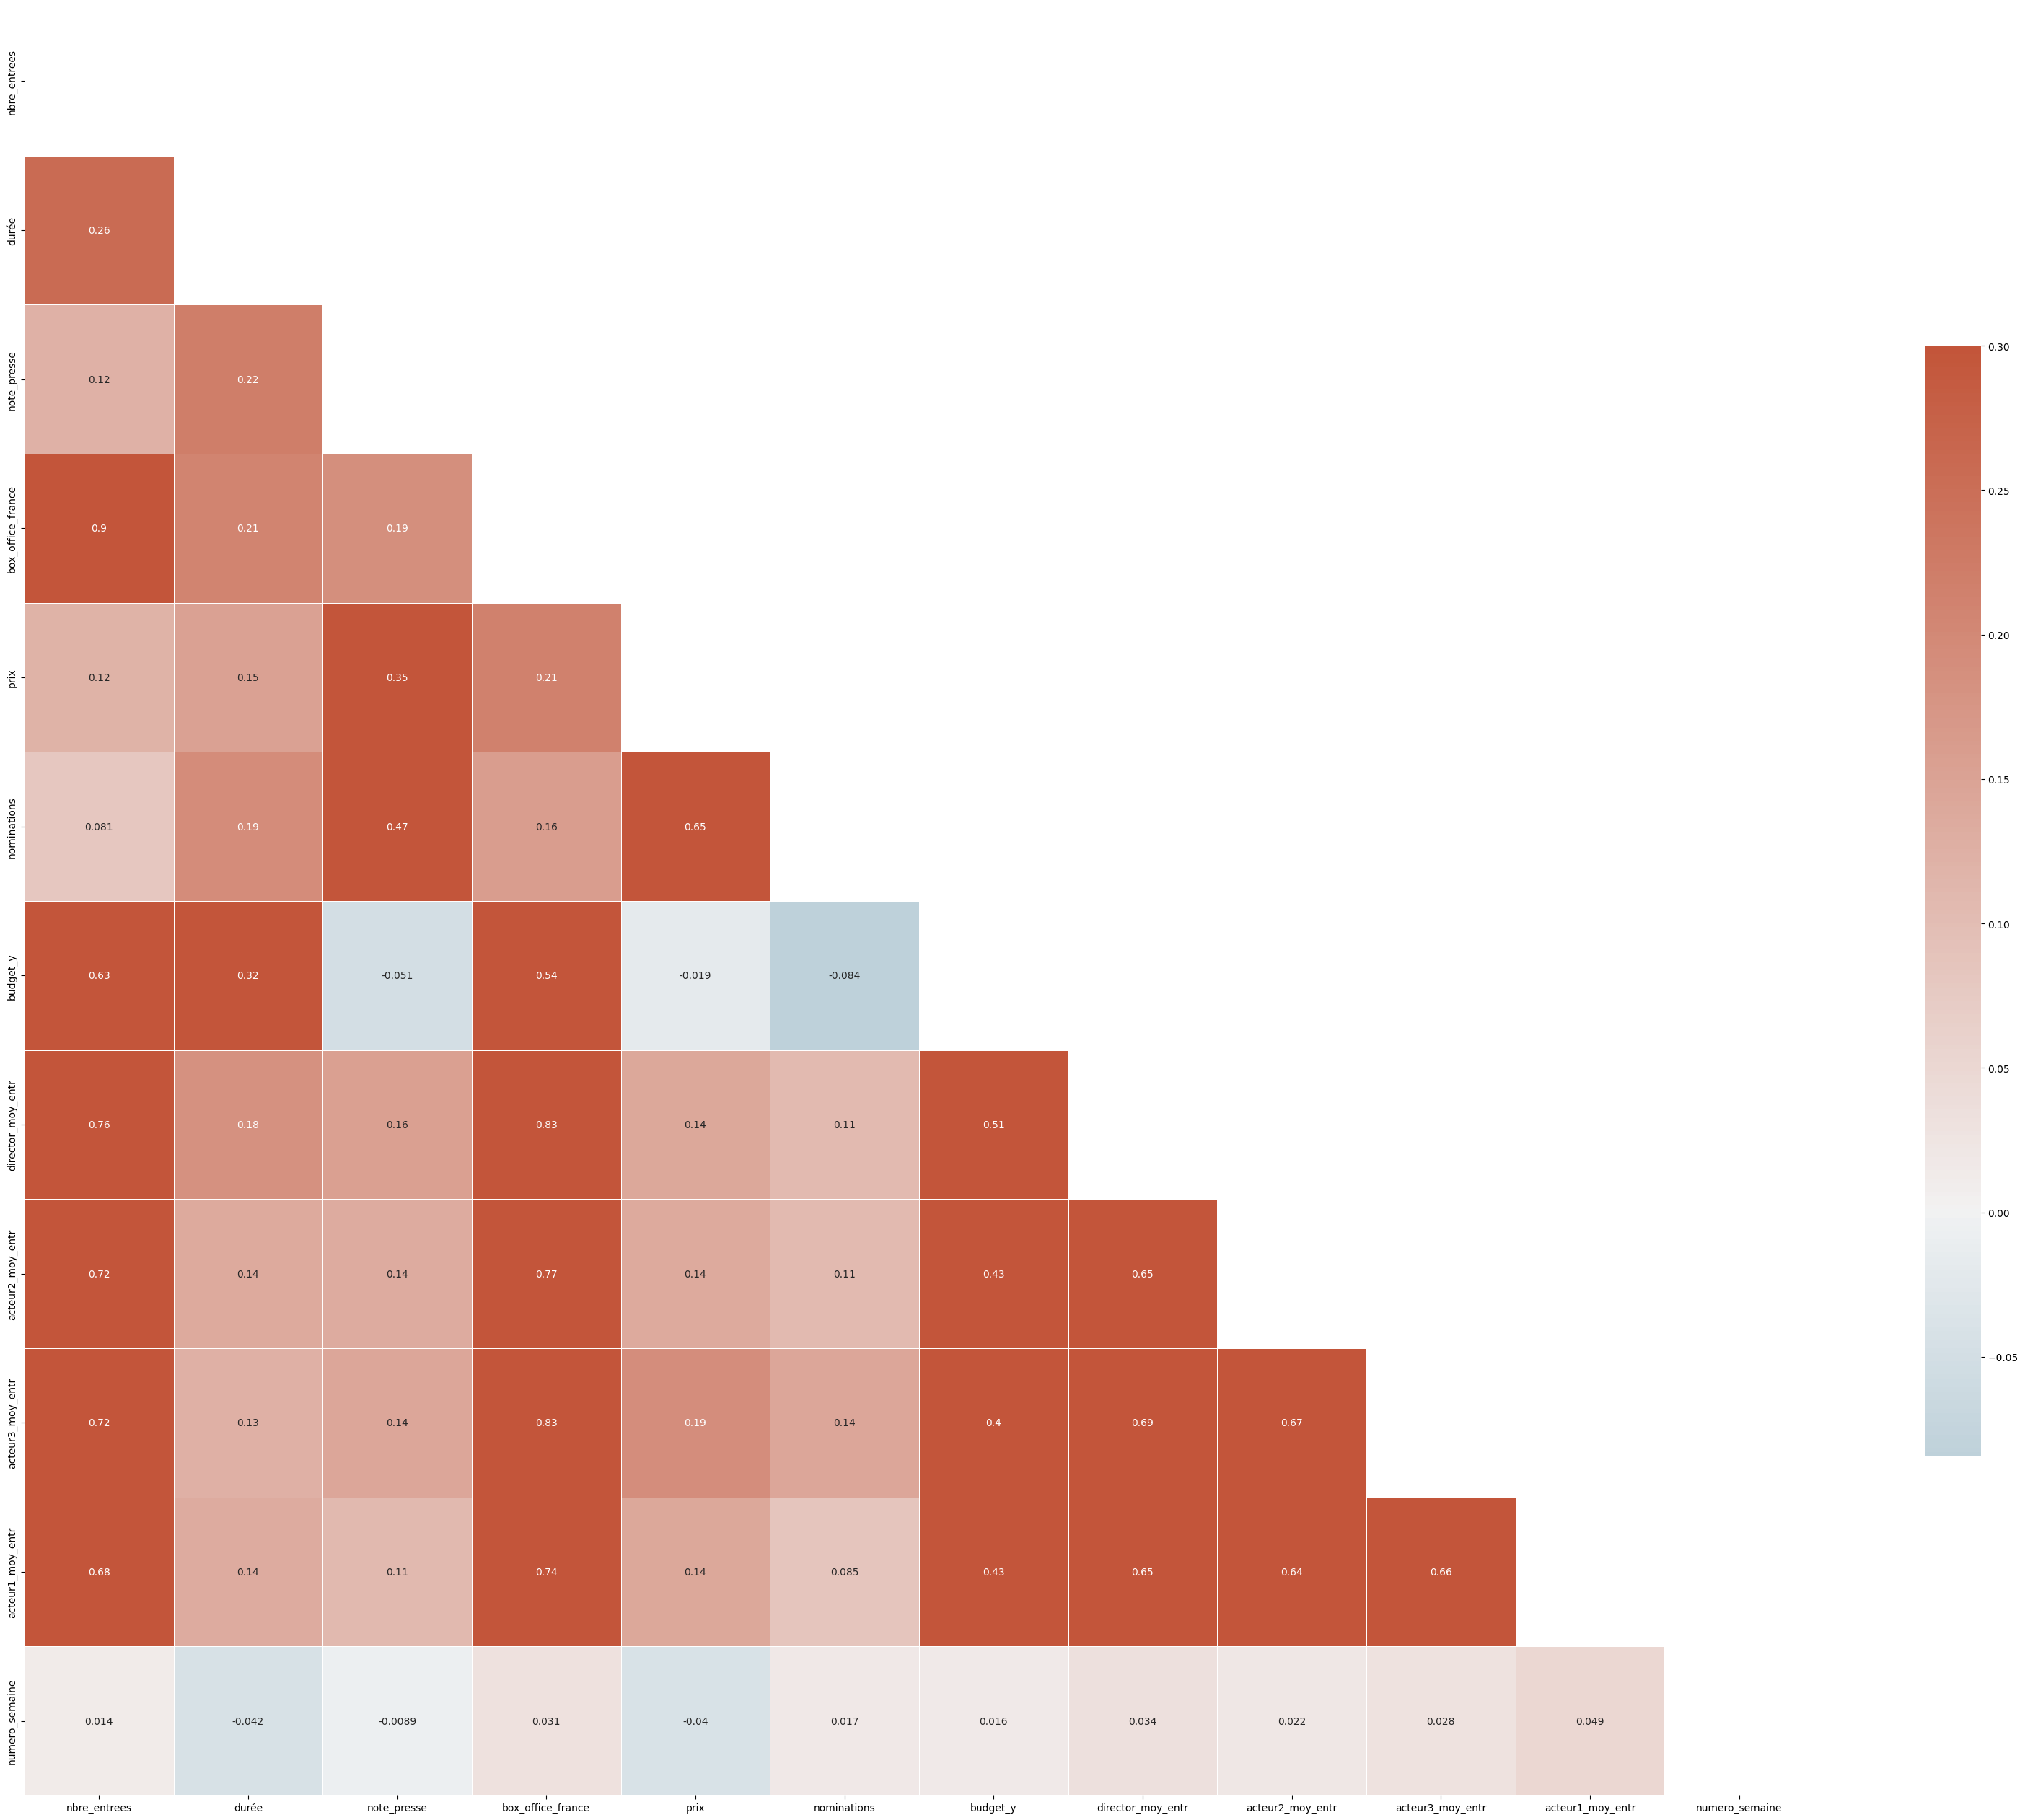

In [17]:
from dython.nominal import associations
from dython.nominal import identify_nominal_columns
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


complete_correlation= associations(df_heat,compute_only=True)
mask = np.triu(np.ones_like(complete_correlation['corr'], dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(40, 40))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(complete_correlation['corr'], mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, annot=True,linewidths=.5, cbar_kws={"shrink": .5})

plt.savefig("corr_matrice.png")

# cleaner colonne budget

In [18]:
def define_budget(row):
    if row['budget_x'] != '0 $':
        return row['budget_x']
    elif row['budget_y'] != 0.0:
        return row['budget_y']
    else:
        return 0

# Appliquer la fonction sur chaque ligne et créer une nouvelle colonne "budget_def"
df_final['budget_def'] = df_final.apply(define_budget, axis=1)

In [19]:
df_final1=df_final.loc[df_final['budget_def']!=0]
df_final1=df_final1.drop(['budget_x','budget_y','acteurs_real'],axis=1)
df_final1.to_csv('new_nettoyage.csv')